<a href="https://colab.research.google.com/github/SourabhThanvi/Pw_Skills_Sourabh/blob/main/Car_Sales_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('/content/Car Sale.csv')

In [ ]:
df_car = df.copy()

In [ ]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


In [ ]:
df_car.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [ ]:
df_car.isna().sum()

,0
Car_id,0
Date,0
Customer Name,1
Gender,0
Annual Income,0
Dealer_Name,0
Company,0
Model,0
Engine,0
Transmission,0


In [ ]:
df_car.duplicated().sum()

0

In [ ]:
df_car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,1/2/2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,1/2/2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,1/2/2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,1/2/2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,1/2/2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


In [ ]:
df_car.dropna(inplace=True)

In [ ]:
df_car['Date']= pd.to_datetime(df_car['Date'])

## 1. What is the average selling price of cars for each dealer, and how does it compare across different dealers?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df_car.rename(columns={'Price ($)':'selling_price'}, inplace=True)

In [ ]:
df_car.groupby('Dealer_Name')['selling_price'].mean()

,selling_price
Dealer_Name,
Buddy Storbeck's Diesel Service Inc,27217.261563
C & M Motors Inc,28111.755200
Capitol KIA,28189.703822
Chrysler Plymouth,27555.526400
Chrysler of Tri-Cities,28123.091054
Classic Chevy,28602.014446
Clay Johnson Auto Sales,27816.027113
Diehl Motor CO Inc,27993.929487
Enterprise Rent A Car,28312.580800


## 2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

In [ ]:
df_car.sample()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,selling_price,Dealer_No,Body Style,Phone,Dealer_Region
14484,C_CND_014485,2023-06-05,Makenzie,Male,850000,Diehl Motor CO Inc,Saturn,LW,Overhead Camshaft,Manual,Pale White,13000,06457-3834,Hatchback,7438626,Greenville


In [ ]:
round(df_car.groupby('Company')['selling_price'].std(),2).sort_values(ascending=False)

,selling_price
Company,
Lincoln,19658.05
Saab,19653.74
Cadillac,19517.12
Plymouth,19066.00
Lexus,17852.92
Buick,17142.23
Mercury,16445.17
Nissan,16214.26
Saturn,15990.22


## 3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?

<Axes: xlabel='Transmission', ylabel='selling_price'>

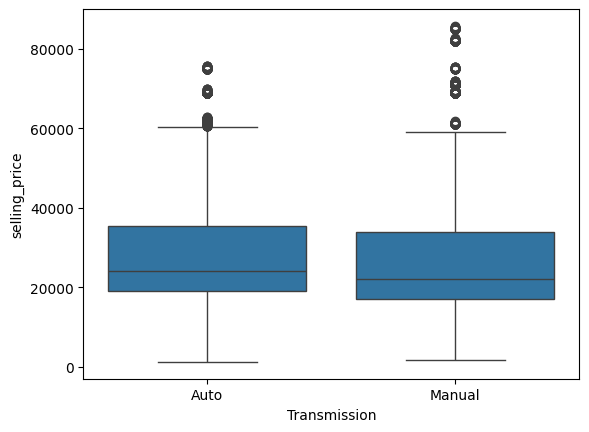

In [ ]:
sns.boxplot(df_car, x='Transmission', y='selling_price')

In [ ]:
q1_Auto = df_car[df_car['Transmission'] == 'Auto']['selling_price'].quantile(0.25)
q3_Auto = df_car[df_car['Transmission'] == 'Auto']['selling_price'].quantile(0.75)

IQR_Auto = q3_Auto-q1_Auto

In [ ]:
IQR_Auto

16500.0

In [ ]:
q1_Manual = df_car[df_car['Transmission'] == 'Manual']['selling_price'].quantile(0.25)
q3_Manual = df_car[df_car['Transmission'] == 'Manual']['selling_price'].quantile(0.75)

IQR_Manual = q3_Manual-q1_Manual

<Axes: xlabel='selling_price', ylabel='Density'>

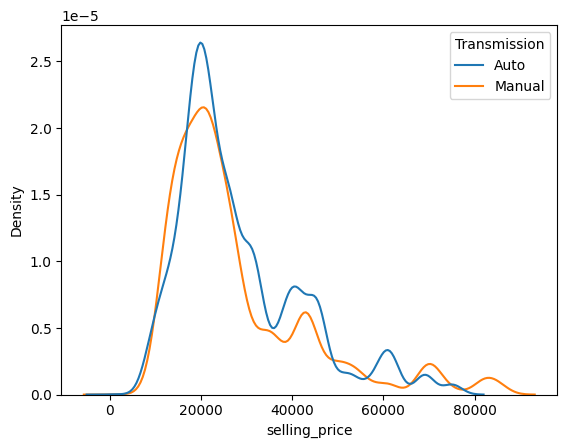

In [ ]:
sns.kdeplot(df_car, x=df_car['selling_price'], hue=df_car['Transmission'])

In [ ]:
df_car['Transmission'].value_counts()

,count
Transmission,
Auto,12570
Manual,11335


## 4. What is the distribution of car prices across different regions?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

<Axes: xlabel='selling_price', ylabel='Density'>

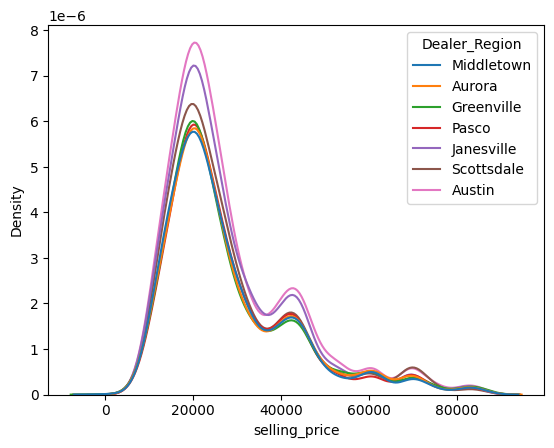

In [ ]:
sns.kdeplot(df_car, x=df_car['selling_price'], hue=df_car['Dealer_Region'])

In [ ]:
df_car['Dealer_Region'].unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

<Figure size 2000x1500 with 0 Axes>

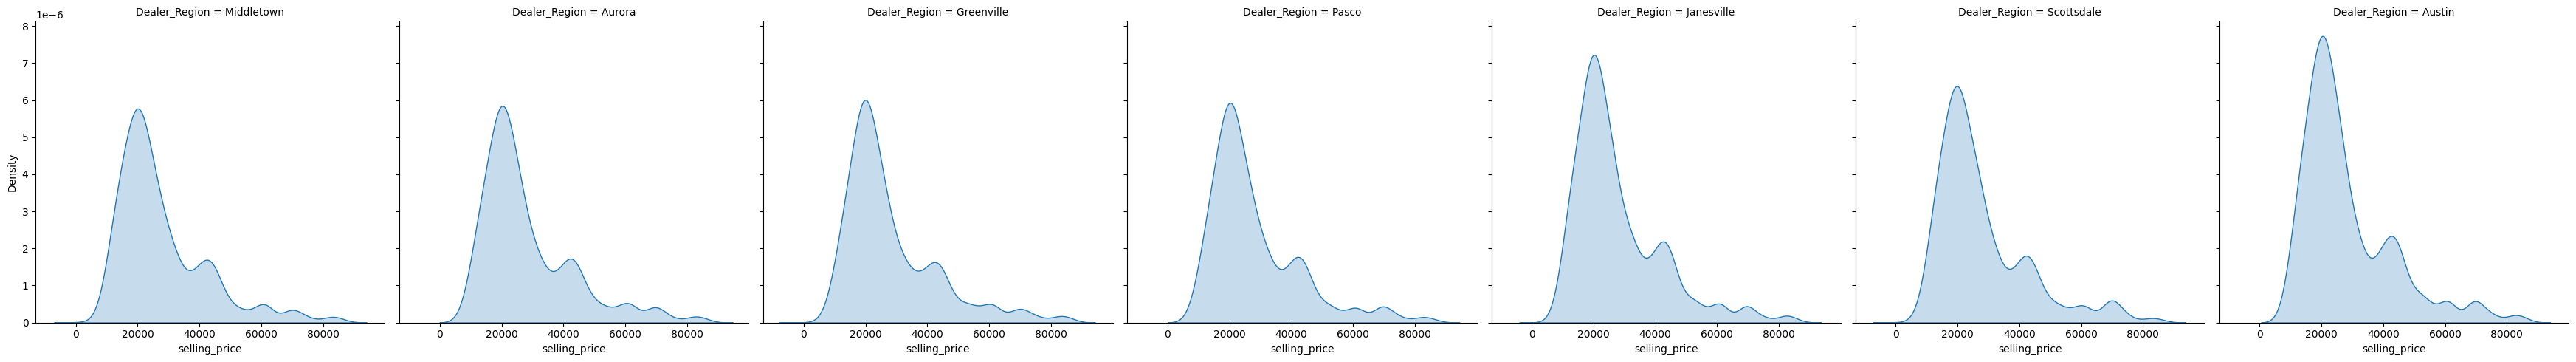

In [ ]:
plt.figure(figsize=(20,15))
sns.displot(df_car, x=df_car['selling_price'], kind='kde', col=df_car['Dealer_Region'], fill=True)
plt.show()

# Approximetly all the region show similar type of distribution

## 5. What is the distribution of cars based on body styles?

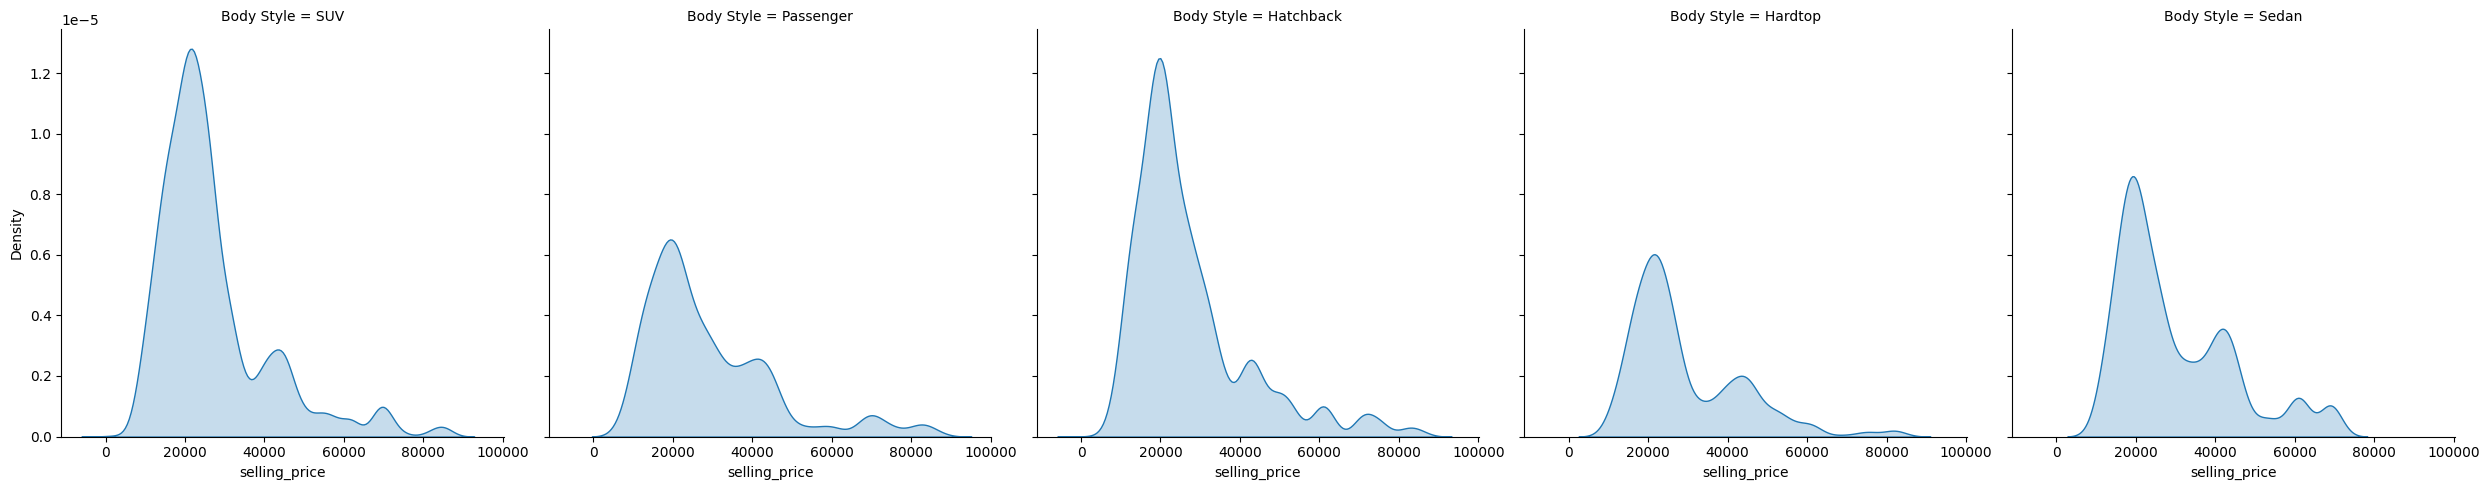

In [ ]:
sns.displot(df_car, x=df_car['selling_price'], col=df_car['Body Style'], kind='kde', fill=True)

## 6. How does the average selling price of cars vary by customer gender and annual income?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [ ]:
df_car['Annual Income'].quantile(0.25)

386000.0

In [ ]:
q1 = df_car['Annual Income'].quantile(0.25)
q3 = df_car['Annual Income'].quantile(0.75)

IQR = q3-q1


In [ ]:
def creating_col(item):
  if item < q1:
    return 'Low'

  elif (item > q1) & (item < q3):
    return 'Medium'

  else :
    return 'High'

In [ ]:
df_car['Income_cat'] = df_car['Annual Income'].apply(creating_col)

In [ ]:
df_car.sample(5)

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,selling_price,Dealer_No,Body Style,Phone,Dealer_Region,Income_cat
19428,C_CND_019429,2023-10-11,Landon,Male,1041000,Chrysler Plymouth,Mercury,Mountaineer,DoubleÂ Overhead Camshaft,Auto,Pale White,21100,53546-9427,Hardtop,8660040,Aurora,Medium
13191,C_CND_013192,2023-04-28,Yachet,Female,550000,Buddy Storbeck's Diesel Service Inc,Chrysler,Cirrus,DoubleÂ Overhead Camshaft,Auto,Pale White,12001,06457-3834,Passenger,7824098,Middletown,Medium
21861,C_CND_021862,2023-11-27,Chloe,Male,13500,Motor Vehicle Branch Office,Mitsubishi,Montero,Overhead Camshaft,Manual,Black,16000,78758-7841,SUV,8783179,Austin,Low
9358,C_CND_009359,2022-12-06,Carter,Male,13500,Classic Chevy,Hyundai,Sonata,Overhead Camshaft,Manual,Black,20001,85257-3102,SUV,8902579,Scottsdale,Low
10271,C_CND_010272,2022-12-24,Omar,Male,485000,Race Car Help,Toyota,RAV4,Overhead Camshaft,Manual,Pale White,22001,78758-7841,Hatchback,8542906,Austin,Medium


In [ ]:
round(df_car.groupby(['Gender', 'Income_cat'])['selling_price'].mean(),2).sort_values(ascending=False)

Gender  Income_cat
Female  High          28402.91
        Medium        28334.42
Male    High          28096.34
        Medium        28067.87
Female  Low           28059.80
Male    Low           27919.06
Name: selling_price, dtype: float64

<Axes: xlabel='selling_price', ylabel='Annual Income'>

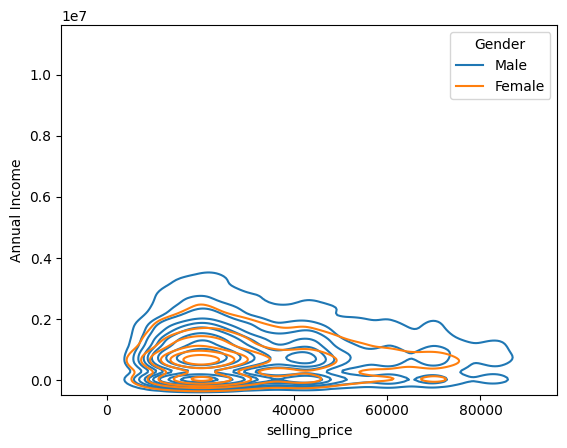

In [ ]:
sns.kdeplot(df_car, x=df_car['selling_price'], y=df_car['Annual Income'], hue=df_car['Gender'])

## 7. What is the distribution of car prices by region, and how does the number of cars sold vary by region?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_cat'],
      dtype='object')

In [ ]:
# number of cars sold vary by region
df_car['Dealer_Region'].value_counts()

,count
Dealer_Region,
Austin,4135
Janesville,3821
Scottsdale,3433
Pasco,3131
Aurora,3129
Middletown,3128
Greenville,3128


In [ ]:
round(df_car.groupby('Dealer_Region')['selling_price'].mean(),2).sort_values(ascending=False)

,selling_price
Dealer_Region,
Austin,28341.60
Aurora,28329.30
Greenville,28180.82
Pasco,28119.04
Scottsdale,27954.96
Middletown,27856.34
Janesville,27833.35


## 8. How does the average car price differ between cars with different engine sizes?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_cat'],
      dtype='object')

In [ ]:
round(df_car.groupby('Engine')['selling_price'].mean(),2)

,selling_price
Engine,
DoubleÂ Overhead Camshaft,28247.19
Overhead Camshaft,27914.71


<Axes: xlabel='selling_price', ylabel='Density'>

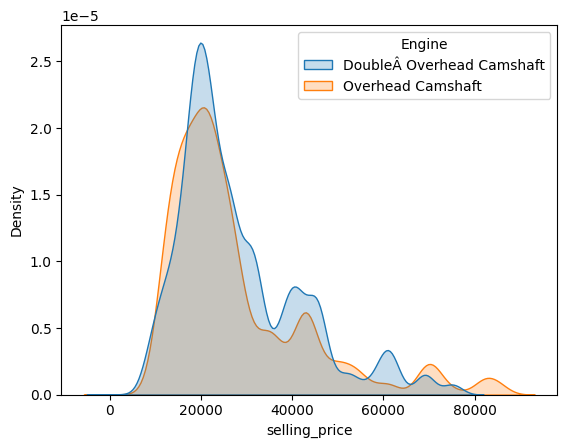

In [ ]:
sns.kdeplot(df_car, x=df_car['selling_price'], hue=df_car['Engine'], fill=True)

## 9. How do car prices vary based on the customer’s annual income bracket?

<Axes: ylabel='proportion'>

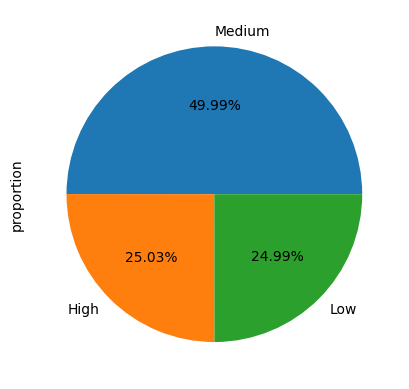

In [ ]:
round(df_car['Income_cat'].value_counts(normalize=True),4).plot(kind='pie', autopct='%1.2f%%')

In [ ]:
round(df_car.groupby('Income_cat')['selling_price'].mean(),2)

,selling_price
Income_cat,
High,28148.09
Low,27950.04
Medium,28129.95


In [ ]:
# High and medium sallary person sell their car at amlost same price.
round(df_car.groupby('Income_cat')['selling_price'].median(),2)

,selling_price
Income_cat,
High,23000.0
Low,22001.0
Medium,23001.0


<Axes: xlabel='Income_cat', ylabel='selling_price'>

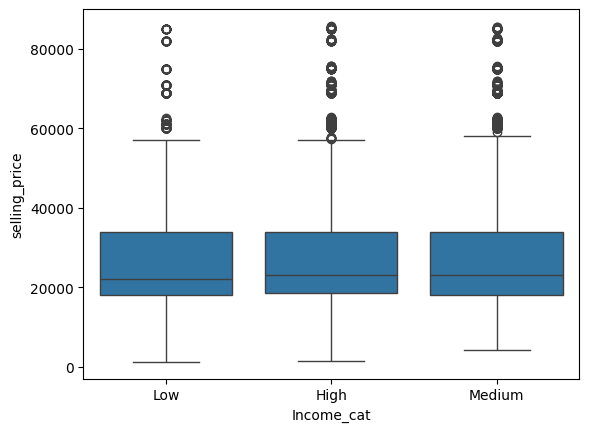

In [ ]:
sns.boxplot(df_car, x=df_car['Income_cat'], y=df_car['selling_price'])

## 10. What are the top 5 car models with the highest number of sales, and how does their price distribution look?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_cat'],
      dtype='object')

In [ ]:
top_car_models = df_car['Model'].value_counts().sort_values(ascending=False).head().reset_index()

In [ ]:
top_car_models

,Model,count
0,Diamante,418
1,Prizm,411
2,Silhouette,411
3,Passat,391
4,Jetta,382


In [ ]:
top_car_models_df = df_car[df_car['Model'].isin(top_car_models['Model'])]

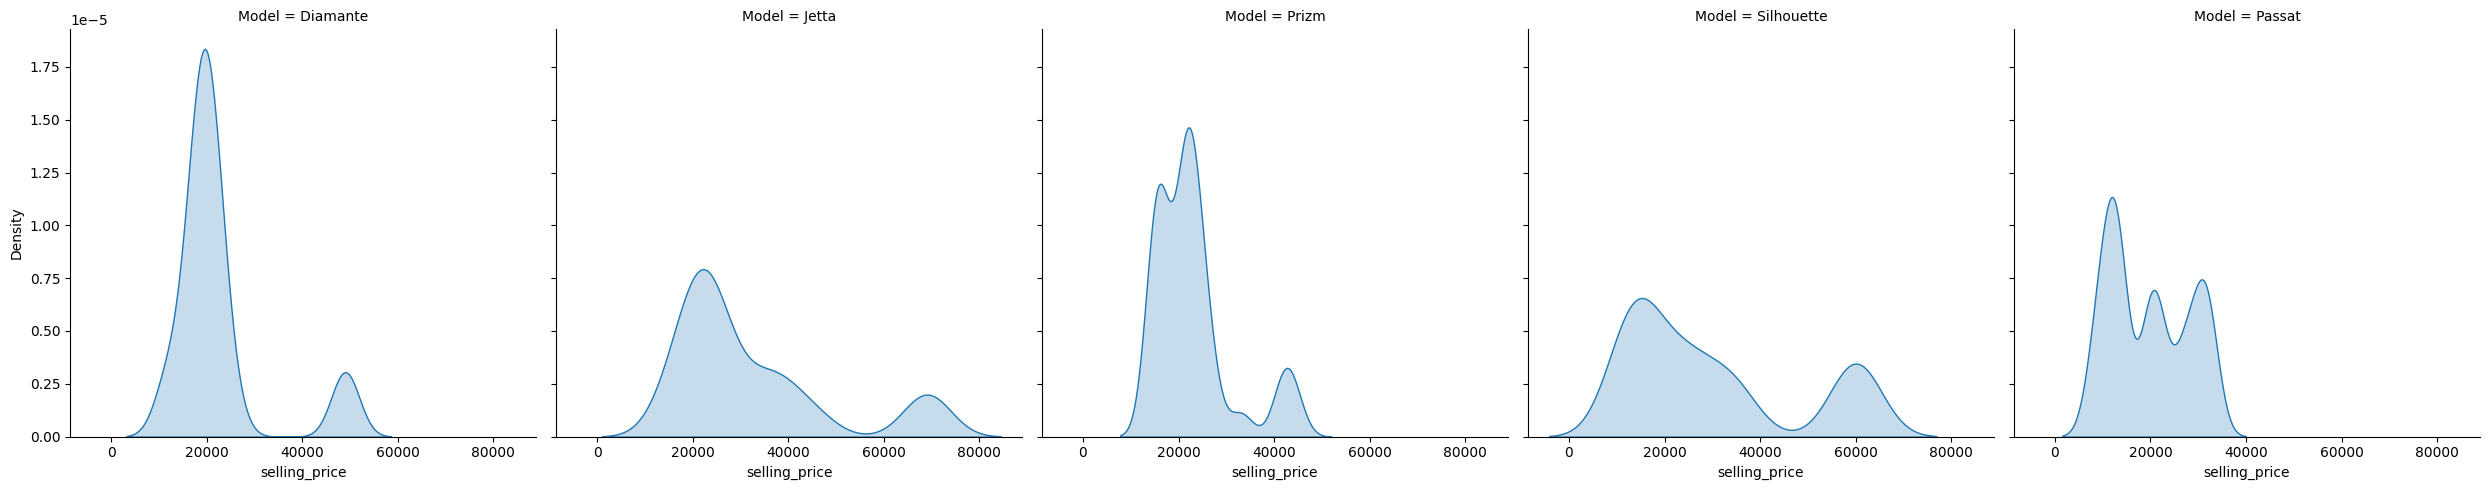

In [ ]:
sns.displot(top_car_models_df, x=top_car_models_df['selling_price'], col=top_car_models_df['Model'], kind='kde', fill=True)

<Axes: xlabel='selling_price', ylabel='Density'>

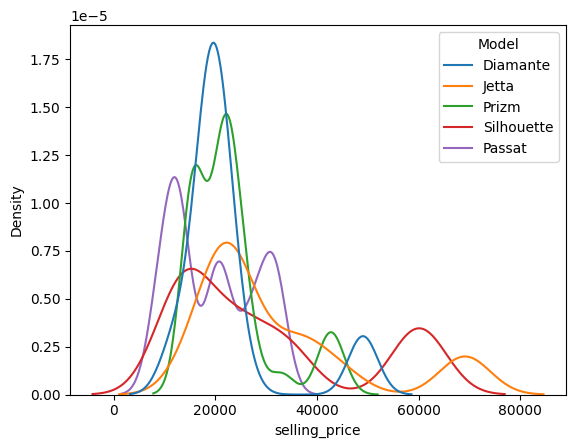

In [ ]:
sns.kdeplot(top_car_models_df, x=top_car_models_df['selling_price'], hue=top_car_models_df['Model'])

<Axes: xlabel='selling_price'>

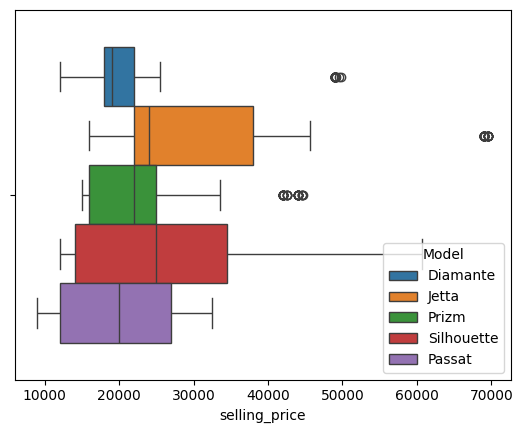

In [ ]:
sns.boxplot(top_car_models_df, x=top_car_models_df['selling_price'], hue=top_car_models_df['Model'])

## 11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_cat'],
      dtype='object')

In [ ]:
df_car['Color'].value_counts()

,count
Color,
Pale White,11255
Black,7857
Red,4793


<Axes: ylabel='count'>

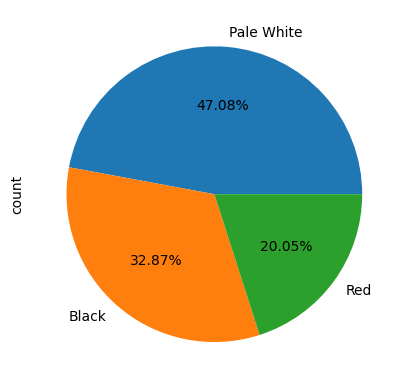

In [ ]:
df_car['Color'].value_counts().plot(kind='pie', autopct='%1.2f%%')

<Axes: xlabel='Engine', ylabel='selling_price'>

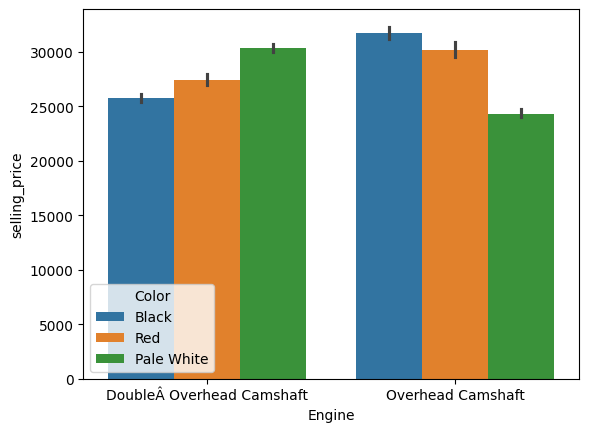

In [ ]:
sns.barplot(df_car, x=df_car['Engine'], y=df_car['selling_price'], hue=df_car['Color'])
# when engine is Double overhead camshaft black color has less demand while pale white has highest demand
# when engine is overhead camshaft black color has highest demand while pale white has lowest demand

In [ ]:
df_car['Engine'].value_counts()

,count
Engine,
DoubleÂ Overhead Camshaft,12570
Overhead Camshaft,11335


## 12. Is there any seasonal trend in car sales based on the date of sale?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_cat'],
      dtype='object')

In [ ]:
df_car.sample()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,selling_price,Dealer_No,Body Style,Phone,Dealer_Region,Income_cat
18532,C_CND_018533,2023-09-19,Dylan,Male,1950000,Suburban Ford,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Auto,Black,16000,53546-9427,SUV,6677275,Janesville,High


In [ ]:
df_car.dtypes

,0
Car_id,object
Date,datetime64[ns]
Customer Name,object
Gender,object
Annual Income,int64
Dealer_Name,object
Company,object
Model,object
Engine,object
Transmission,object


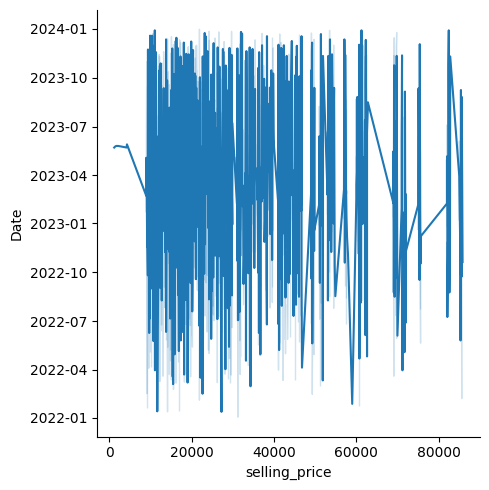

In [ ]:
sns.relplot(df_car, y=df_car['Date'], x=df_car['selling_price'], kind='line')

In [ ]:
px.line(df_car, x=df_car['Date'], y=df_car['selling_price'])

## 13. How does the car price distribution change when considering different combinations of body style and transmission type?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_cat'],
      dtype='object')

In [ ]:
df_car.sample()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,selling_price,Dealer_No,Body Style,Phone,Dealer_Region,Income_cat
11285,C_CND_011286,2023-02-09,Jason,Male,440000,Ryder Truck Rental and Leasing,Oldsmobile,Bravada,DoubleÂ Overhead Camshaft,Auto,Red,15000,06457-3834,Hatchback,7689061,Middletown,Medium


<Axes: xlabel='Transmission', ylabel='selling_price'>

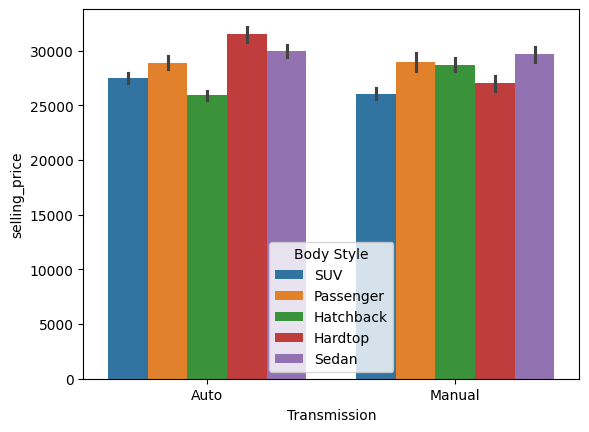

In [ ]:
sns.barplot(df_car, y=df_car['selling_price'], x=df_car['Transmission'], hue=df_car['Body Style'])

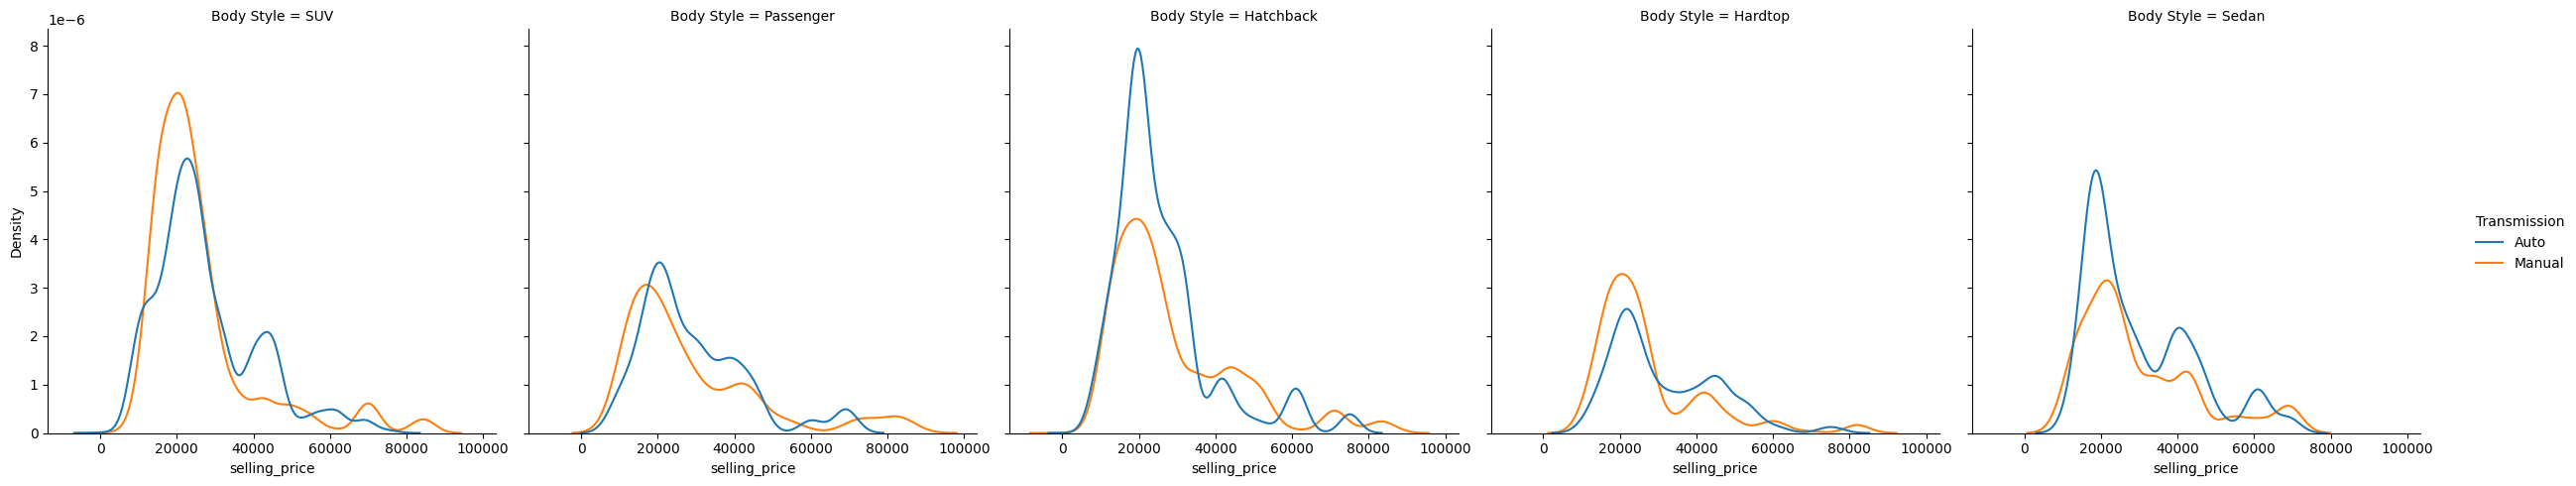

In [ ]:
sns.displot(df_car, x=df_car['selling_price'], hue=df_car['Transmission'], col=df_car['Body Style'], kind='kde')

In [ ]:
round(df_car.groupby(['Transmission', 'Body Style'])['selling_price'].mean(),2)

Transmission  Body Style
Auto          Hardtop       31510.61
              Hatchback     25910.54
              Passenger     28915.84
              SUV           27501.40
              Sedan         29955.29
Manual        Hardtop       27016.94
              Hatchback     28702.55
              Passenger     28969.52
              SUV           26079.02
              Sedan         29664.27
Name: selling_price, dtype: float64

## 14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

In [ ]:
pivot_data = df_car.pivot_table(values='selling_price', index='Body Style', columns='Transmission', aggfunc='mean')

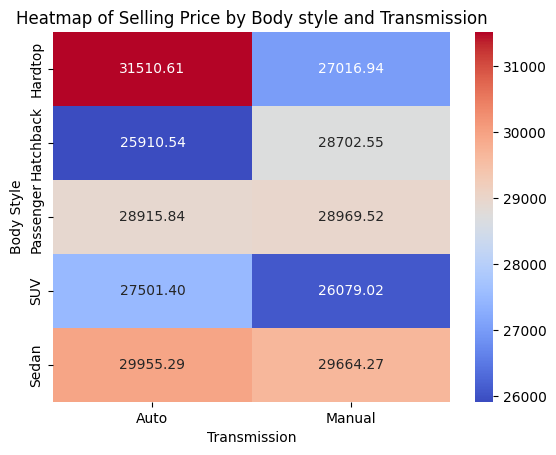

In [ ]:

sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of Selling Price by Body style and Transmission')
plt.show()

## 15. How does the average car price vary across different car models and engine types?

In [ ]:
df_car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'selling_price', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region',
       'Income_cat'],
      dtype='object')

In [ ]:
car_model = df_car['Model'].value_counts().sort_values(ascending=False).head().reset_index()

In [ ]:
df_car_model = df_car[df_car['Model'].isin(car_model['Model'])]

In [ ]:
df_car_model.groupby(['Model','Engine'])['selling_price'].mean()

Model       Engine                   
Diamante    DoubleÂ Overhead Camshaft    19253.146341
            Overhead Camshaft            25170.215962
Jetta       DoubleÂ Overhead Camshaft    33105.028571
            Overhead Camshaft            29591.450980
Passat      DoubleÂ Overhead Camshaft    19730.953846
            Overhead Camshaft            19342.267176
Prizm       DoubleÂ Overhead Camshaft    23588.941558
            Overhead Camshaft            22388.750973
Silhouette  DoubleÂ Overhead Camshaft    42558.078431
            Overhead Camshaft            22327.375969
Name: selling_price, dtype: float64

In [ ]:
pivot_data = df_car_model.pivot_table(values='selling_price', index='Model', columns='Engine', aggfunc='mean')

<Axes: xlabel='Engine', ylabel='Model'>

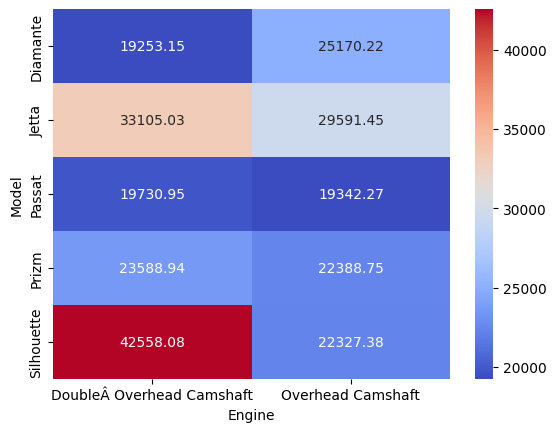

In [ ]:
sns.heatmap(pivot_data, annot=True, cmap='coolwarm', fmt='.2f')